In [1]:
from platform import python_version

print(python_version())

3.7.12


In [2]:
import findspark
findspark.init()
findspark.find()

'C:\\spark'

In [3]:
import pyspark 

In [4]:
import os
import pandas as pd
import numpy as np

from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext

from pyspark.sql.types import *
import pyspark.sql.functions as F
from pyspark.sql.functions import udf, col

from pyspark.ml.regression import LinearRegression
from pyspark.mllib.evaluation import RegressionMetrics

from pyspark.ml.tuning import ParamGridBuilder, CrossValidator, CrossValidatorModel
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.evaluation import RegressionEvaluator

In [5]:
import pymongo

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["mydatabase"]
mycol = mydb["people"]

In [6]:
import json
x = mycol.find()
l=[]

for data in x:
    new_list = list(data.values())
    new_list.pop(0)
    
    l.append(new_list)
    
df=pd.DataFrame(l ,columns=["id","addip","years","moth","day","heur","min","sec","method","status"])
df


,id,addip,years,moth,day,heur,min,sec,method,status
0,1183,77.245.233.52,2019,1,22,12,38,59,GET,200
1,1184,89.144.137.213,2019,1,22,12,38,59,GET,302
2,1185,104.248.18.193,2019,1,22,12,38,59,GET,200
3,1186,93.118.108.2,2019,1,22,12,38,59,GET,200
4,1187,93.118.108.2,2019,1,22,12,38,59,GET,200
...,...,...,...,...,...,...,...,...,...,...
1590,2773,46.224.113.43,2019,1,22,12,39,31,GET,200
1591,2774,31.59.209.196,2019,1,22,12,39,31,GET,302
1592,2775,46.62.152.3,2019,1,22,12,39,31,GET,200
1593,2776,185.186.240.178,2019,1,22,12,39,31,GET,200


In [7]:
# define the schema, corresponding to a line in the csv data file.
schema = StructType([
    StructField("id", IntegerType(), nullable=True),
    StructField("addip", StringType(), nullable=True),
    StructField("years", IntegerType(), nullable=True),
    StructField("moth", IntegerType(), nullable=True),
    StructField("day", IntegerType(), nullable=True),
    StructField("heur", IntegerType(), nullable=True),
    StructField("min", IntegerType(), nullable=True),
    StructField("sec", IntegerType(), nullable=True),
    StructField("method", StringType(), nullable=True),
    StructField("status", IntegerType(), nullable=True)]
)

In [8]:
spark = SparkSession.builder.master("local[2]").appName("Linear-Regression-California-Housing").getOrCreate()

In [9]:
housing_df = spark.createDataFrame (df, schema=schema)

In [10]:
housing_df.show(5)

+----+--------------+-----+----+---+----+---+---+------+------+
|  id|         addip|years|moth|day|heur|min|sec|method|status|
+----+--------------+-----+----+---+----+---+---+------+------+
|1183| 77.245.233.52| 2019|   1| 22|  12| 38| 59|   GET|   200|
|1184|89.144.137.213| 2019|   1| 22|  12| 38| 59|   GET|   302|
|1185|104.248.18.193| 2019|   1| 22|  12| 38| 59|   GET|   200|
|1186|  93.118.108.2| 2019|   1| 22|  12| 38| 59|   GET|   200|
|1187|  93.118.108.2| 2019|   1| 22|  12| 38| 59|   GET|   200|
+----+--------------+-----+----+---+----+---+---+------+------+
only showing top 5 rows



In [11]:
g=housing_df.groupBy("method").count().sort("method")

In [12]:
g.show()

+------+-----+
|method|count|
+------+-----+
|   GET| 1569|
|  HEAD|    7|
|  POST|   19|
+------+-----+



<AxesSubplot:xlabel='method'>

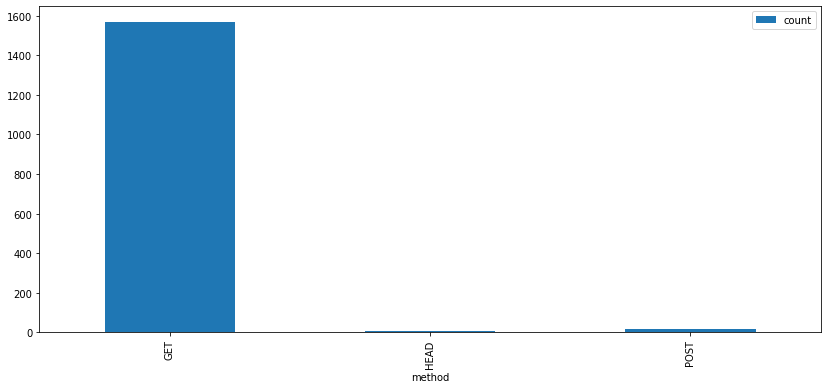

In [14]:
g.toPandas().plot.bar(x="method",figsize=(14, 6))